### Alumno: Ferreyra, Marcos José (29554)


# TP1 Geomecánica de los Reservorios (ELASTICIDAD)    
### Se recomienda seguir la lectura de la notebook con el acompñamiento del trabajo práctico realizado.

## Ejercicio 1

Graficar los datos vs profundidad. El formato debe ser el siguientes para las gráficas:
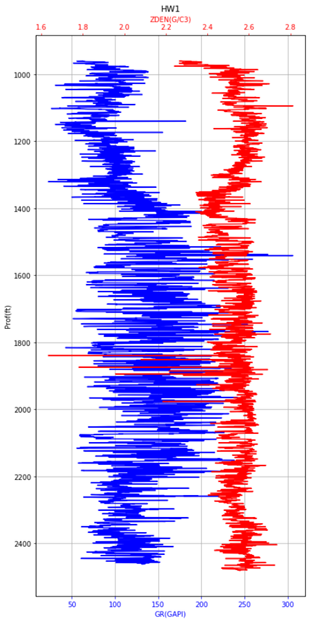

a. DEPTH: Profundidad (m)

b. GR: Gamma Ray (GAPI) 

c. DT: Tiempo de tránsito compresional (US/F) 

d. DTSD: Tiempo de tránsito de corte (US/F) 

e. ZDEN: Densidad (G/C3) 


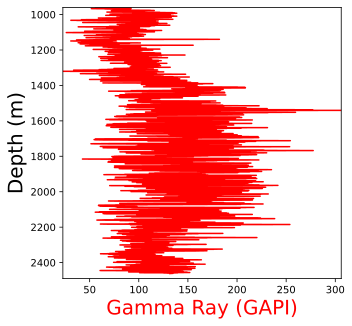

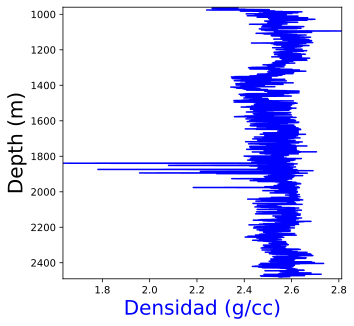

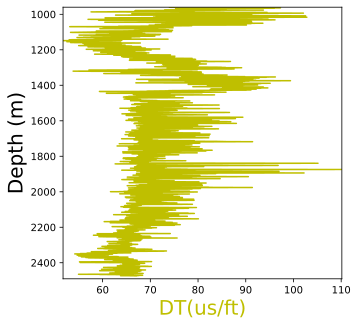

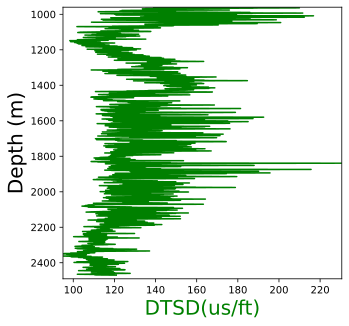

In [24]:
from openpyxl import *

excel_file = load_workbook('HW1_datos_v2.xlsx') #Llamo al archivo de Excel y lo abro
activacion=excel_file.active

depth = []       #Creo las listas donde voy a introducir
dt =[]           #los datos del Excel
dtsd = []
gr = []         
zden = []

worksheet=excel_file['POZO'] #Selecciono la hoja indicada
q_rows=worksheet.max_row    #Cantidad de filas de mi hoja 

#Leo los datos de las columnas (fila por fila) y los guardo en las listas creadas anteriormente
for d in range(3, q_rows+1):
    depthvalue=worksheet.cell(row=d, column=1).value
    depth.append(depthvalue)
    
for t in range(3, q_rows+1):
    dtvalue=worksheet.cell(row=t, column=2).value
    if dtvalue == -999.25:
        continue
    else:
        dt.append(dtvalue) 
    
for s in range(3, q_rows+1):
    dtsdvalue=worksheet.cell(row=s, column=3).value
    if dtsdvalue == -999.25:
        continue
    else:
        dtsd.append(dtsdvalue) 
    
for r in range(3, q_rows+1):
    grvalue=worksheet.cell(row=r, column=4).value
    if grvalue == -999.25:
        continue
    else:
        gr.append(grvalue)
    
for z in range(3, q_rows+1):
    zdenvalue=worksheet.cell(row=z, column=5).value
    if zdenvalue == -999.25:
        continue
    else:
        zden.append(zdenvalue)    
    
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.ylim(np.max(depth), np.min(depth))
plt.xlim(np.min(gr), np.max(gr))
plt.xlabel('Gamma Ray (GAPI)',fontsize = 20,color = 'r')
plt.ylabel('Depth (m)',fontsize = 20)
fig = plt.plot(gr, depth[0:len(gr)],'r')

plt.figure(figsize=(5,5))
plt.ylim(np.max(depth), np.min(depth))
plt.xlim(np.min(zden), np.max(zden))
plt.xlabel('Densidad (g/cc)',fontsize = 20,color = 'b')
plt.ylabel('Depth (m)',fontsize = 20)
fig = plt.plot(zden, depth[0:len(zden)],'b')

plt.figure(figsize=(5,5))
plt.ylim(np.max(depth), np.min(depth))
plt.xlim(np.min(dt), np.max(dt))
plt.xlabel('DT(us/ft)',fontsize = 20,color = 'y')
plt.ylabel('Depth (m)',fontsize = 20)
fig = plt.plot(dt, depth[0:len(dt)],'y')

plt.figure(figsize=(5,5))
plt.ylim(np.max(depth), np.min(depth))
plt.xlim(np.min(dtsd), np.max(dtsd))
plt.xlabel('DTSD(us/ft)',fontsize = 20,color = 'g')
plt.ylabel('Depth (m)',fontsize = 20)
fig = plt.plot(dtsd, depth[0:len(dtsd)],'g')

## Ejercicio 2 

Creo nuevamente listas pero donde almacenaré los datos convertidos al Sistema Internacional


In [25]:
VP =[];       
VS = [];
GR = [];         
DEN = [];  

Tanto el tiempo de transito compresional (DT)como el tiempo de tránsito de corte (DTSD) se encuentran en us/ft (Microsegundo sobre pie) lo cuál es la inversa de la velocidad. Lo invertiré  y realizaré la conversión a m/s. De esta manera  obtendremos la velocidad de onda compresional y de corte:

In [26]:
for h in dt:
    dt_si  =  1/(h*(1*(10**(-6))/0.3048));
    VP.append(dt_si);
    
for l in dtsd:
    dtsd_si  =  1/(l*(1*(10**(-6))/0.3048));
    VS.append(dtsd_si);

Y por último realizamos la conversión de la densidad, de g/cm^3 a kg/m^3:

In [27]:
for d in zden:
    zden_si  =  d*1000;
    DEN.append(zden_si);

Como el Módulo de Young se enceuntra en función del coeficiente de Poisson, obtendremos este último primero:

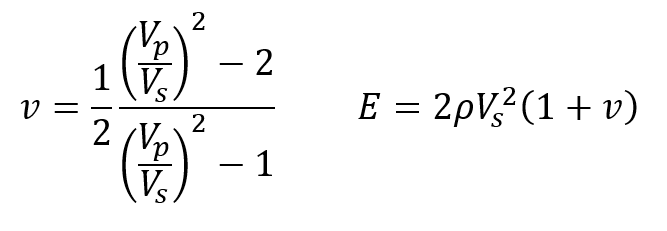

In [28]:
e_din  =  [];
v_din  =  [];
for vs, vp, rho in zip(VS, VP, DEN):
    r = 0.5*(((vp/vs)**2)-2)/(((vp/vs)**2)-1);
    v_din.append(r);
    e = 2*rho*(vs**2)*(1+r);
    e_din.append(e)


## Ejercicio 3

Gráfico E vs PROFUNDIDAD

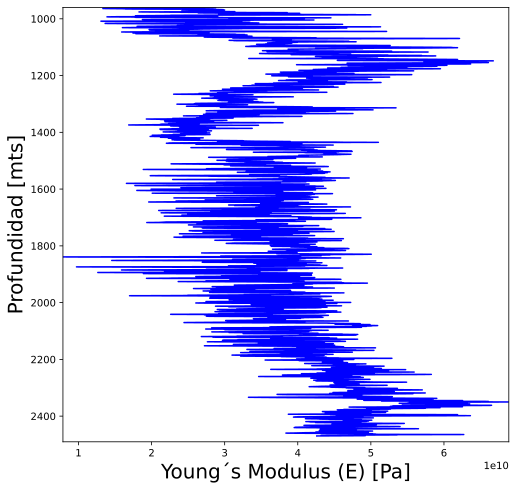

In [46]:
plt.figure(figsize=(8,8))
plt.xlim(np.min(e_din), np.max(e_din))
plt.ylim(np.max(depth), np.min(depth))
plt.xlabel('Young´s Modulus (E) [Pa]',fontsize = 20)
plt.ylabel('Profundidad [mts]',fontsize = 20)
fig = plt.plot(e_din, depth[0:len(e_din)],'b')

Gráfico v vs PROFUNDIDAD

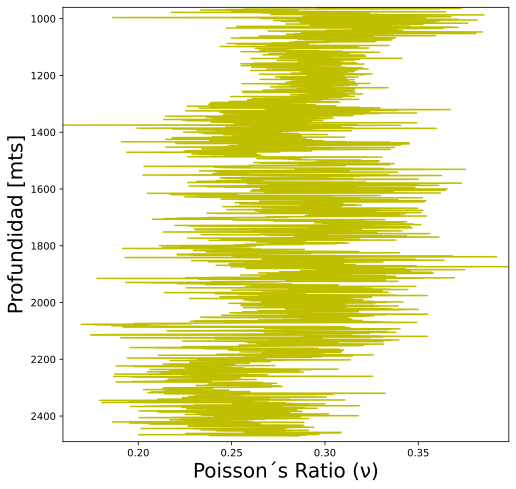

In [45]:
plt.figure(figsize=(8,8))
plt.xlim(np.min(v_din), np.max(v_din))
plt.ylim(np.max(depth), np.min(depth))
plt.xlabel('Poisson´s Ratio (ν)',fontsize = 20)
plt.ylabel('Profundidad [mts]',fontsize = 20)
fig = plt.plot(v_din, depth[0:len(v_din)],'y')

## Ejercicio 4

Clcularemos el módulo M, es un módulo que junto
con Phi, nos demuestra como aumenta la presión poral
a medida que aumenta el volumen del fluido dentro
del sólido. Teniendo E y ν, aplicamos la siguiente ecuación y podemos obtener M:



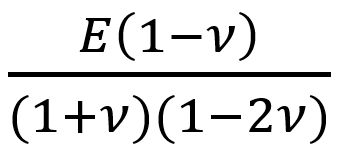

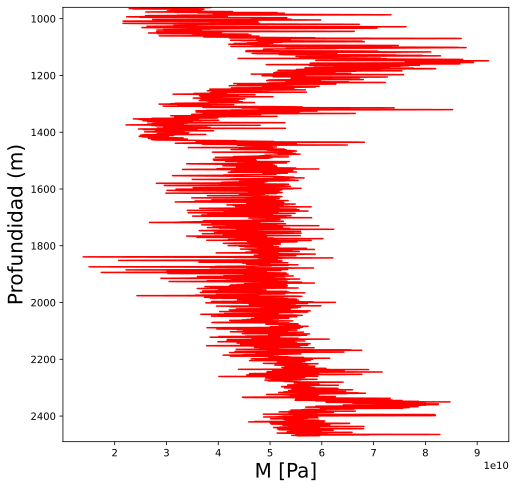

In [44]:
M  =  [];
for e, p in zip(e_din, v_din):
    m  =  e*(1-p)/((1+p)*(1-2*p))
    M.append(m)
    
plt.figure(figsize=(8,8))
plt.ylim(np.max(depth), np.min(depth))
plt.xlabel('M [Pa]',fontsize = 20)
plt.ylabel('Profundidad (m)',fontsize = 20)
fig = plt.plot(M, depth[0:len(M)],'r')

Por otro lado calcularemos el módulo de cizalladura μ:


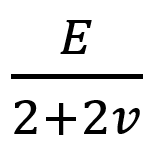

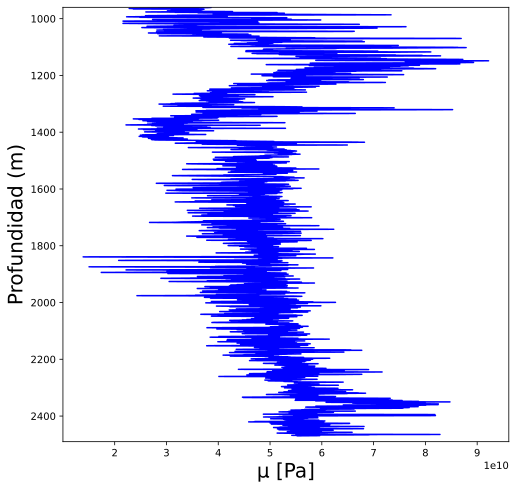

In [43]:
MU = [];
for e, p in zip(e_din, v_din):
    mu  =  e/(2+2*p);
    MU.append(mu);
plt.figure(figsize=(8,8))
plt.ylim(np.max(depth), np.min(depth))
plt.xlabel('μ [Pa]',fontsize = 20)
plt.ylabel('Profundidad (m)',fontsize = 20)
fig = plt.plot(M, depth[0:len(M)],'b')

# Ejercicio 5

Lo primero a realizar es la extracción de datos del laboratorio y realizar la conversión de Mpsi a Pascal:


In [33]:
worksheet1=excel_file['LABORATORIO'] 
q_rows=worksheet1.max_row    

e_est = []
prof_muestra = []
mpsi_pa = 6894757293.1683;

for b in range(3, q_rows):
    e_est_value_mpsi  =  worksheet1.cell(row=b, column=3).value
    e_est_value_mpa = e_est_value_mpsi*mpsi_pa
    e_est.append(e_est_value_mpa)
    
for a in range(3, q_rows):
    prof_m_value  =  worksheet1.cell(row=a, column=2).value
    prof_muestra.append(prof_m_value)


Obtenemos los valores del Módulo de Young Dinámico de los puntos próximos a las mismas profundidades de las cuales fueron obtenidas las muestras: 

**e_din_muestra** son los valores del módulo de Young dinámico obtenidos a una distancia menor a 10cm de las profundidades donde fueron tomadas las muestras ensayadas en el laboratorio

[58600589804.03322, 49031928011.40232, 59971668121.042984, 58801335017.98148, 56406553496.85344, 62145310621.12007, 53793699285.07742, 53999312965.01248, 46294725384.28498]


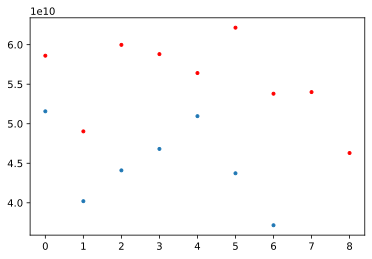

In [34]:
e_din_muestra = []
for d in prof_muestra:
    for D, q in zip(depth,e_din):
        tol=0.1
        tol_min = d-tol
        tol_max = d+tol
        if tol_min < D < tol_max :
            e_din_muestra.append(q)
            
print(e_din_muestra)    
plt.plot(e_est,'.')
plt.plot(e_din_muestra,'.r')

Graficamos los valores obtenidos, los puntos rojos son los módulos de Young dinámicos, mientras que los azules los estáticos. Proseguimos a graficar los pares ordenados (x ; y) del tal manera que **(x = E dinámico ; y = E estático)**

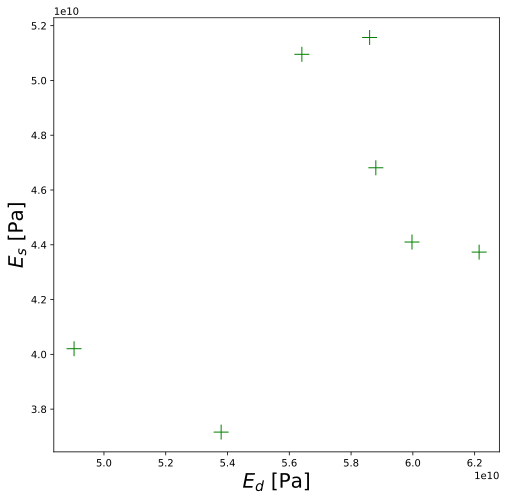

In [41]:
plt.figure(figsize=(8,8))
plt.ylabel('$E_s$ [Pa]',fontsize = 20)
plt.xlabel('$E_d$ [Pa]', fontsize = 20)
plt.plot(e_din_muestra[0:7], e_est,'g+', markersize = 15)
# En la coordenada X está el E dinámico y en la coordenada 'y' el E estático

Procedemos a realizar la interpolación lineal con los puntos graficados en el gráfico de arriba:

Correlación lineal: 
Es=  0.5586827717380967 Ed +  13108103979.287157


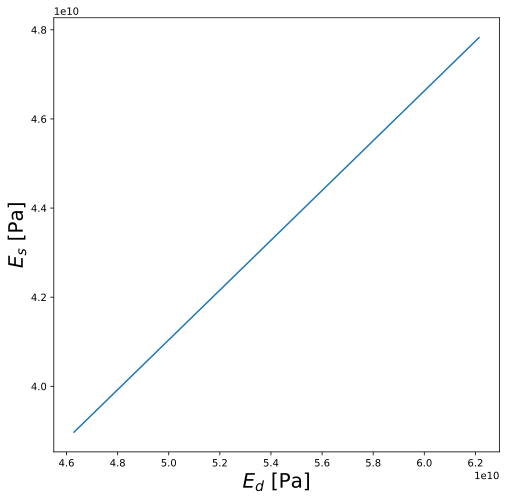

In [42]:
#Interpolación de valores
polyorder = 1;
p=np.polyfit(e_din_muestra[0:7], e_est, polyorder) 
#Curve Fitting with a Polynomial Function
# p are the coefficients of the poly, 
# p=np.polyfit(xdata, ydata, pOrder)

y_p = np.polyval(p, e_din_muestra)        # y_p = np.polyval(p, valores donde quiero evaluar el polinomio)
plt.figure(figsize=(8,8))
plt.ylabel('$E_s$ [Pa]',fontsize = 20)
plt.xlabel('$E_d$ [Pa]', fontsize = 20)
plt.plot(e_din_muestra, y_p)
print('Correlación lineal: ')
print('Es= ',p[0],'Ed + ',p[1])


Una vez obtenido la correlación lineal, la aplicamos a todos los valores del pozo:

In [40]:
#Valores de Módulo de Young dinámico pasado a estático
#utilizando la correlación obtenida
e_din2sta = []
for i in e_din:
    value = 0.5586827717380967*i+13108103979.287157;
    e_din2sta.append(value)


plt.figure(figsize=(9,9))
plt.ylabel('[Pa]',fontsize = 20)
plt.plot(e_din2sta,'+r', markersize = 5)
plt.plot(e_din,'.', markersize = 5)



Ahora aplicamos la misma correlación al coeficiente de Poisson:

In [39]:
#Valores de Coeficientes de Poisson dinámico pasado a estático
#utilizando la correlación obtenida
v_din2sta = []
for i in v_din:
    value = 0.5586827717380967*i+13108103979.287157;
    v_din2sta.append(value)


plt.figure(figsize=(5,5))
plt.plot(v_din2sta,'+r', markersize = 5)
plt.plot(v_din,'.', markersize = 5)